14044
[2.4138440196129776, -2.312579283412937, -0.6074816714683151, 1.0, -0.13093337346185324]


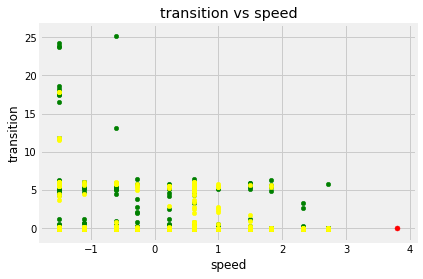

controlled Group(not infected)
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      8953
           1       0.58      0.32      0.41      5091

    accuracy                           0.67     14044
   macro avg       0.64      0.60      0.59     14044
weighted avg       0.65      0.67      0.64     14044



In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
from sklearn import preprocessing, neighbors, metrics
from sklearn.model_selection import train_test_split
from random import seed, randrange
import random
style.use('fivethirtyeight')
%matplotlib inline

df1 = pd.read_csv('beesdata.csv')
df1 = df1.drop(['rfid'], 1)

cols = list(df1.columns)
cols.remove('Treatment code')

df = pd.DataFrame(columns=['Temperature_zscore', 'Humidity_zscore', 'Speed_zscore', 'Treatment code', 'transition_zscore'])

# now iterate over the remaining columns and create a new zscore column
for col in cols:
    col_zscore = col + '_zscore'
    df['Treatment code'] = df1['Treatment code']
    df[col_zscore] = (df1[col] - df1[col].mean())/df1[col].std(ddof=0)

# ----------------

# Split a dataset into a train and test set
def mytrain_test_split(df, split=0.80):
    train = list()
    train_size = split * len(df)
    test = list(df)
    while len(train) < train_size:
        index = randrange(len(test))
        train.append(test.pop(index))
    return train, test

seed(1)
train, test = mytrain_test_split(df.values.tolist())
print(len(train))
print(test[0])


dataset = {'controlled Group(not infected)': [], 'nosema(infected)': []}
def load_into(label, code):
    for item in train:
        if(item[3] == code):
            dataset[label].append([item[0], item[1], item[2], item[4]])

c = 0
for key in dataset:
    load_into(key, c)
    c = 1
#print(dataset)

temp_list =  []
for item in train:
    temp_list.append(item[4])  

new_features = np.array([89.6, 37, 3.8, 0.0])
new_features = new_features.reshape(1, -1)



def k_nearest_neighbors(data, predict, k):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

speed = []
transition = []
temperature = []
for item in train:
    temperature.append(item[0])
    speed.append(item[2])
    transition.append(item[3])

col_var = 0
for i in dataset:
    for ii in dataset[i]:
        if(col_var == 0):
            plt.scatter(ii[2],ii[3], s=20, c='green')
        else:
            plt.scatter(ii[2],ii[3], s=20, c='yellow')
    col_var = 1

# ----------------------------------------------------------

# x = np.array(df.drop(['Treatment code'], 1))
# y = np.array(df['Treatment code'])
# tr_data, val_data, tr_labels, val_labels = train_test_split(x, y, test_size=0.1, random_state=84)
# kVals = range(1, 200, 2)
# accuracies = []

# for k in range(10, 200, 2):
#     model = k_nearest_neighbors(dataset, new_features, k)
#     #model.fit(tr_data, tr_labels)
#     score = model.score(val_data, val_labels)
#     print("k=%d, accuracy=%.2f%%" % (k, score * 100))
#     accuracies.append(score)

# i = np.argmax(accuracies)
# print("k=%d achieved highest accuracy of %.2f%% on validation data" % (1, accuracies[i] * 100))

# result = k_nearest_neighbors(dataset, new_features, i)

# -----------------------------------------------------------

result = k_nearest_neighbors(dataset, new_features, 81)
plt.scatter(new_features[0][2], new_features[0][3], s=25, c='red')
plt.title('transition vs speed')
plt.xlabel('speed')
plt.ylabel('transition')
#plt.legend()
plt.show()
print(result)

full_data = df.astype(float).values.tolist()
#print(full_data)
random.shuffle(full_data)

test_size = 0.8
train_set = {0:[], 1:[]}
test_set = {0:[], 1:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-2]].append([i[0], i[1], i[2], i[4]])

for i in test_data:
    test_set[i[-2]].append([i[0], i[1], i[2], i[4]])

correct = 0
total = 0

actual_list = []
pred_list = []
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, 81)
        actual_list.append(group)
        pred_list.append(vote)
        if group == vote:
            correct += 1
        total += 1›

print(pred_list[:5])
print(actual_list[:5])
#print(dataset['controlled Group(not infected)'][0])

actual_list = np.array(actual_list)
pred_list = np.array(pred_list)
print(metrics.classification_report(actual_list, pred_list))


              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.00      0.00      0.00         0

    accuracy                           0.60         5
   macro avg       0.50      0.30      0.37         5
weighted avg       1.00      0.60      0.75         5

Confusion Matrix :  [[3 2]
 [0 0]]
Accuracy :  60.0
Precision :  0.0
Recall :  0.0
F1 score : 0.0


/Library/Python/3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Python/3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/Library/Python/3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [ ]:

plt.show()
print(result)

full_data = df.astype(float).values.tolist()
#print(full_data)
random.shuffle(full_data)

test_size = 0.8
train_set = {0:[], 1:[]}
test_set = {0:[], 1:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-2]].append([i[0], i[1], i[2], i[4]])

for i in test_data:
    test_set[i[-2]].append([i[0], i[1], i[2], i[4]])

correct = 0
total = 0

actual_list = []
pred_list = []
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, 81)
        actual_list.append(group)
        pred_list.append(vote)
        if group == vote:
            correct += 1
        total += 1

print(pred_list[:5])
print(actual_list[:5])
#print(dataset['controlled Group(not infected)'][0])

actual_list = np.array(actual_list)
pred_list = np.array(pred_list)
print(classification_report(actual_list, pred_list))

# print('Accuracy:', correct/total)
# print('Confusion Matrix : ', metrics.confusion_matrix(actual_list, pred_list).ravel())
# print('Accuracy : ', 100* metrics.accuracy_score(actual_list, pred_list))
# print('Precision : ', 100* metrics.precision_score(actual_list, pred_list))
# print('Recall : ', 100* metrics.recall_score(actual_list, pred_list))
# print('F1 score :', metrics.f1_score(actual_list, pred_list))

['Temperature', 'Humidity', 'Speed', 'Treatment code', 'transition']
   Temperature  Humidity  Speed  Treatment code  transition
0         89.6        37    3.8               1       0.000
1         90.9        35    1.6               1       8.778
2         90.9        35    1.6               1       0.529
3         90.9        35    1.6               1       0.497
4         80.6        47    5.4               0       0.000
yep
   Temperature_zscore  Humidity_zscore  Speed_zscore  Treatment code  \
0            2.262420        -2.187704      0.609966               1   
1            2.413844        -2.312579     -0.607482               1   
2            2.413844        -2.312579     -0.607482               1   
3            2.413844        -2.312579     -0.607482               1   
4            1.214102        -1.563325      1.495382               0   

   transition_zscore  
0          -0.131548  
1          -0.130933  
2          -0.131511  
3          -0.131514  
4          -0.13154